In [1]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
val_Label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1])
val_Label.shape

(28685,)

In [12]:
val_Bag = np.argmax(np.load("pattern1/validation_Bag_関口分類.npy"), axis=1).reshape([-1]) + 1
val_Bag.shape

(28685,)

(8, 0.5)

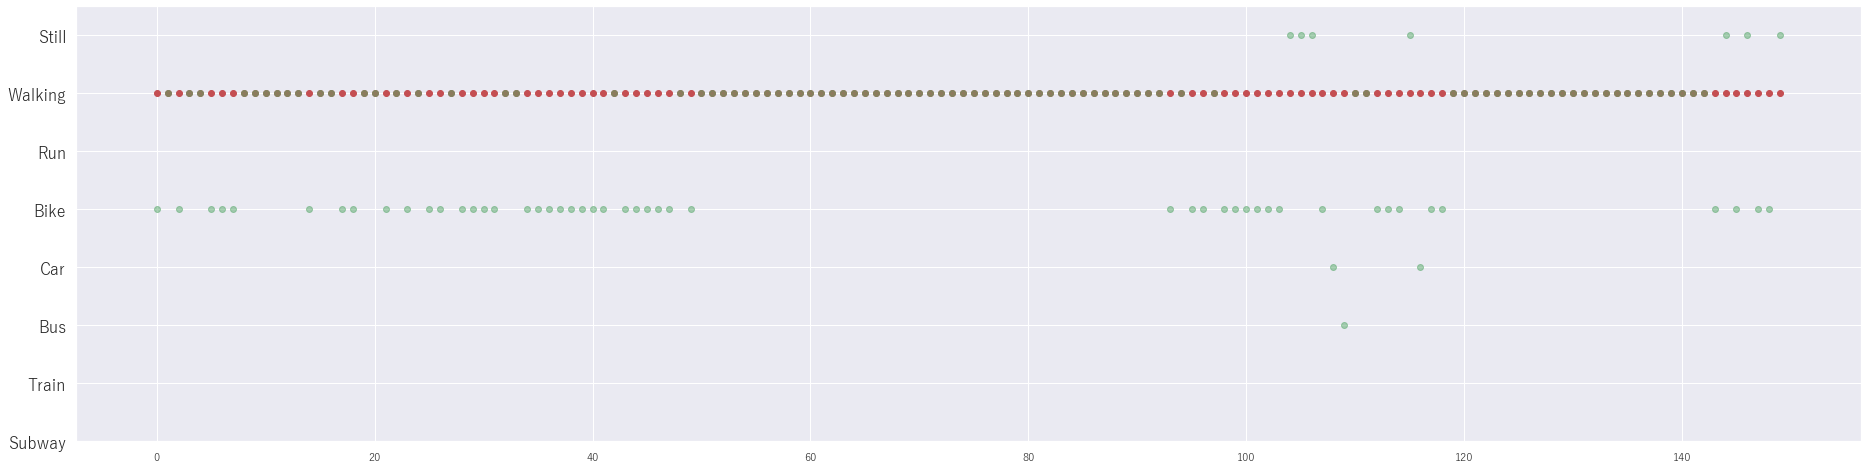

In [66]:
plt.figure(figsize=(32, 8))
plt.plot(val_Label[350:500], 'r', marker='o', linestyle='None')
plt.plot(val_Bag[350:500], 'g', marker='o', linestyle='None', alpha=0.5)
plt.yticks(np.arange(1, 9), ['Still', "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"], fontsize=16)
plt.ylim(8, 0.5)

In [61]:
val_Bag_LAcc = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Glo_LAcc.npy")
val_Bag_LAcc.shape

(28685, 500, 3)

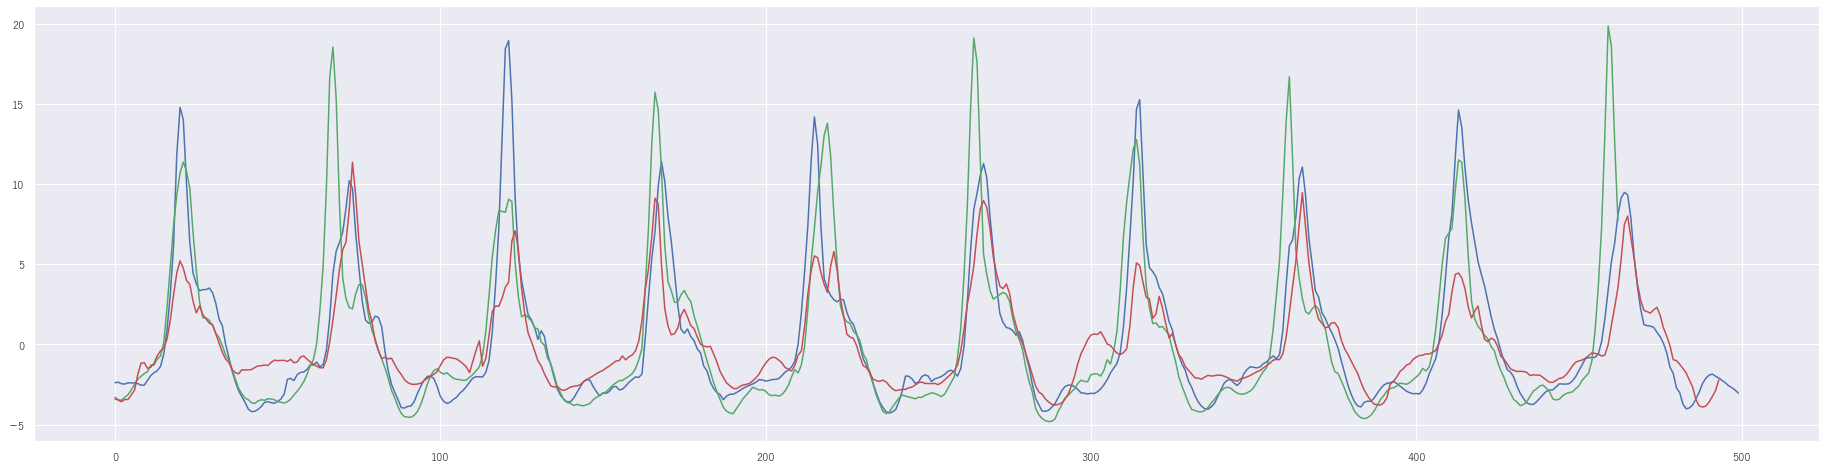

In [175]:
plt.figure(figsize=(32, 8))
plt.plot(val_Bag_LAcc[385, :, 2].flatten(), 'b')
plt.plot(val_Bag_LAcc[387, 37:, 2].flatten(), 'g')
plt.plot(val_Bag_LAcc[420, 6:, 2].flatten(), 'r')

(-0.5, 0.5)

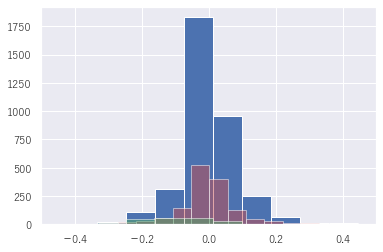

In [182]:
val_Bag_lacc_z_var = np.load("../../Output/validation/validation_Bag/validation_Bag_glo_laccel_z_mean.npy")
plt.hist(val_Bag_lacc_z_var[np.where(val_Bag[val_Label == 2] == 2)], color='b', bins=100)
plt.hist(val_Bag_lacc_z_var[np.where(val_Bag[val_Label == 2] != 2)], color='r', alpha=0.5, bins=100)
plt.hist(val_Bag_lacc_z_var[np.where(val_Bag[val_Label == 3] == 3)], color='g', alpha=0.5, bins=100)

plt.xlim(-0.5, 0.5)

In [93]:
np.where(val_Bag[val_Label == 2] != 2)

(array([  75,   76,   88, ..., 5187, 5188, 5189], dtype=int64),)